<a href="https://colab.research.google.com/github/ShiuliDey/R-programming/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
import xgboost as XGB
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('RawData.csv')

In [ ]:
df.head()

,PATIENT_ID,AGE,SEX,ZIP,BMI,HEIGHT,WEIGHT,TUBERCULOSIS,SYSTEMIC LUPUS ERYTHMATOSUS,RHEUMATOID ARTHRITIS,...,DIABETES TYPE II,TRANSPLANT,HEMODIALYSIS Pre Diagnosis,HEMODIALYSIS Post diagnosis,CANCER,COVID TEST POSITIVE,TEST NAME,ICU Admit,#ICU Admit,MORTALITY
0,COVID-19-AR-16406529,70,M,721,25.69,"6'0""",193,N,N,N,...,Y,N,N,N,N,Y,SARS-CoV-2 (COVID-19),Y,1,Y
1,COVID-19-AR-16406508,78,M,720,27.85,"5'6""",197,N,N,N,...,N,N,N,N,N,Y,SARS-CoV-2 (COVID-19),Y,1,Y
2,COVID-19-AR-16406529,64,M,718,30.12,"6'0""",204,N,N,N,...,Y,N,N,N,N,Y,SARS-CoV-2 (COVID-19),Y,1,Y
3,COVID-19-AR-16406508,68,M,715,31.66,"5'6""",211,N,N,N,...,N,N,N,Y,N,Y,SARS-CoV-2 (COVID-19),Y,2,Y
4,COVID-19-AR-16424115,66,F,712,35.60,"5'7""",225,N,N,N,...,N,Y,N,Y,N,Y,SARS-CoV-2 (COVID-19),Y,2,Y


In [ ]:
df.isnull().sum()

PATIENT_ID                     0
AGE                            0
SEX                            0
ZIP                            0
BMI                            0
HEIGHT                         0
WEIGHT                         0
TUBERCULOSIS                   0
SYSTEMIC LUPUS ERYTHMATOSUS    0
RHEUMATOID ARTHRITIS           0
EXTENSIVE BURNS                0
ASPLENIA                       0
HYPOSPLENIA                    0
MEASLES                        0
CYTOMEGALOVIRUS                0
CHICKEN POX                    0
HERPES ZOSTER                  0
MALNUTRITION                   0
CURRENT PREGNANT               0
CHRONIC KIDNEY DISEASE         0
DIABETES TYPE I                0
DIABETES TYPE II               0
TRANSPLANT                     0
HEMODIALYSIS Pre Diagnosis     0
HEMODIALYSIS Post diagnosis    0
CANCER                         0
COVID TEST POSITIVE            0
TEST NAME                      0
ICU Admit                      0
#ICU Admit                     0
MORTALITY 

In [ ]:
cat_features = ['SEX', 'TUBERCULOSIS', 'SYSTEMIC LUPUS ERYTHMATOSUS', 'RHEUMATOID ARTHRITIS',
                'EXTENSIVE BURNS', 'ASPLENIA', 'HYPOSPLENIA', 'MEASLES',
                'CYTOMEGALOVIRUS', 'CHICKEN POX', 'HERPES ZOSTER', 'MALNUTRITION',
                'CURRENT PREGNANT', 'CHRONIC KIDNEY DISEASE', 'DIABETES TYPE I',
                'DIABETES TYPE II', 'TRANSPLANT', 'HEMODIALYSIS Pre Diagnosis',
                'HEMODIALYSIS Post diagnosis', 'CANCER', 'COVID TEST POSITIVE',
                'TEST NAME', 'ICU Admit', 'MORTALITY']

In [ ]:
num_features = ['AGE', 'ZIP', 'BMI', 'HEIGHT', 'WEIGHT', '#ICU Admit']

In [ ]:
features = cat_features + num_features
features.remove('MORTALITY')
features.remove('HEIGHT')
target = 'MORTALITY'

In [ ]:
label = LabelEncoder()

In [ ]:
for i in cat_features:
    df[i] = label.fit_transform(df[i])

In [ ]:
df.tail()

,PATIENT_ID,AGE,SEX,ZIP,BMI,HEIGHT,WEIGHT,TUBERCULOSIS,SYSTEMIC LUPUS ERYTHMATOSUS,RHEUMATOID ARTHRITIS,...,DIABETES TYPE II,TRANSPLANT,HEMODIALYSIS Pre Diagnosis,HEMODIALYSIS Post diagnosis,CANCER,COVID TEST POSITIVE,TEST NAME,ICU Admit,#ICU Admit,MORTALITY
39995,COVID-19-AR-16406545,30,1,720,64.60,"5'8""",412,0,0,0,...,0,0,0,0,0,0,3,0,0,0
39996,COVID-19-AR-16406521,54,0,719,19.65,"5'7""",110,0,0,0,...,0,0,0,0,0,0,3,0,1,0
39997,COVID-19-AR-16406521,44,0,721,40.03,"5'5""",280,0,0,0,...,0,0,0,0,0,0,3,0,0,0
39998,COVID-19-AR-16445151,54,0,721,26.64,"5'9""",161,0,0,0,...,1,0,0,0,1,0,2,0,1,0
39999,COVID-19-AR-16406559,33,0,721,28.37,"5'7""",182,0,0,0,...,0,0,0,1,1,0,3,0,1,0


Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2)

In [ ]:
model = XGB.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

Testing

In [ ]:
preds = model.predict(X_test)

In [ ]:
accuracy_score(y_test, preds)

0.998625

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [ ]:
print("Precision: ", (tp/(tp + fp)))
print("Recall: ", (tp/(tp + fn)))

Precision:  0.9975012493753124
Recall:  0.9997495617330328


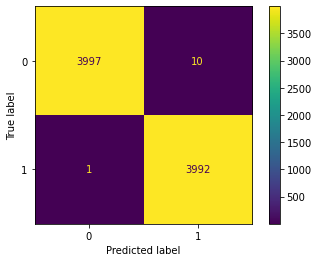

In [ ]:
plot_confusion_matrix(model, X_test, y_test)